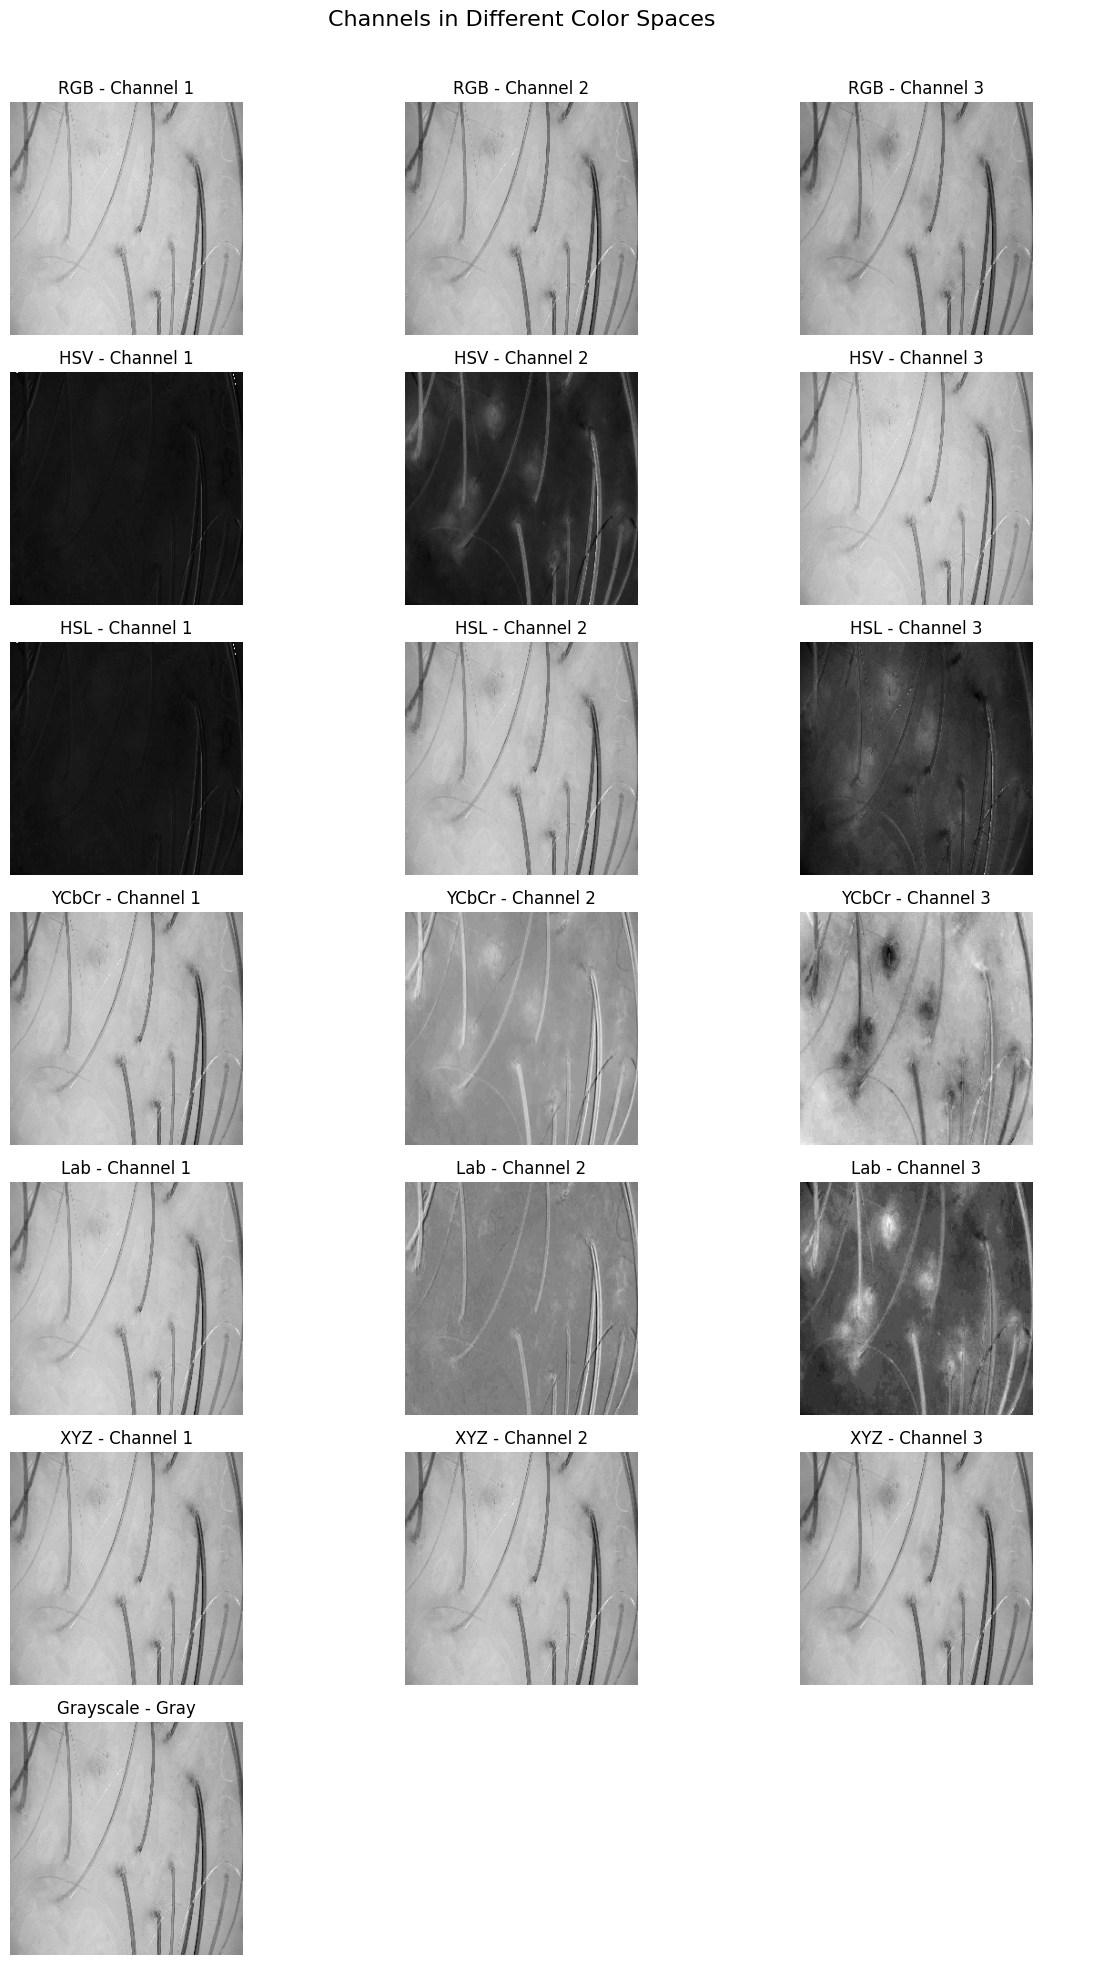

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load sample image from OpenCV and resize for display purposes
image = cv2.imread(cv2.samples.findFile("./łysienie/03945.jpg"))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (256, 256))

# Define color space conversions and their channel names
color_spaces = {
    "RGB": ("RGB", image),
    "HSV": ("HSV", cv2.cvtColor(image, cv2.COLOR_RGB2HSV)),
    "HSL": ("HLS", cv2.cvtColor(image, cv2.COLOR_RGB2HLS)),
    "YCbCr": ("Y, Cb, Cr", cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)),
    "Lab": ("L, a, b", cv2.cvtColor(image, cv2.COLOR_RGB2Lab)),
    "XYZ": ("X, Y, Z", cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)),
    "Grayscale": ("Gray", cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)),
}

# Plot all channels
fig, axs = plt.subplots(len(color_spaces), 3, figsize=(12, 20))
fig.suptitle("Channels in Different Color Spaces", fontsize=16)

for idx, (space, (label, img)) in enumerate(color_spaces.items()):
    if space == "Grayscale":
        axs[idx, 0].imshow(img, cmap='gray')
        axs[idx, 0].set_title(f"{space} - {label}")
        axs[idx, 1].axis('off')
        axs[idx, 2].axis('off')
    else:
        for ch in range(3):
            axs[idx, ch].imshow(img[:, :, ch], cmap='gray')
            axs[idx, ch].set_title(f"{space} - Channel {ch + 1}")
    for ch in range(3):
        axs[idx, ch].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


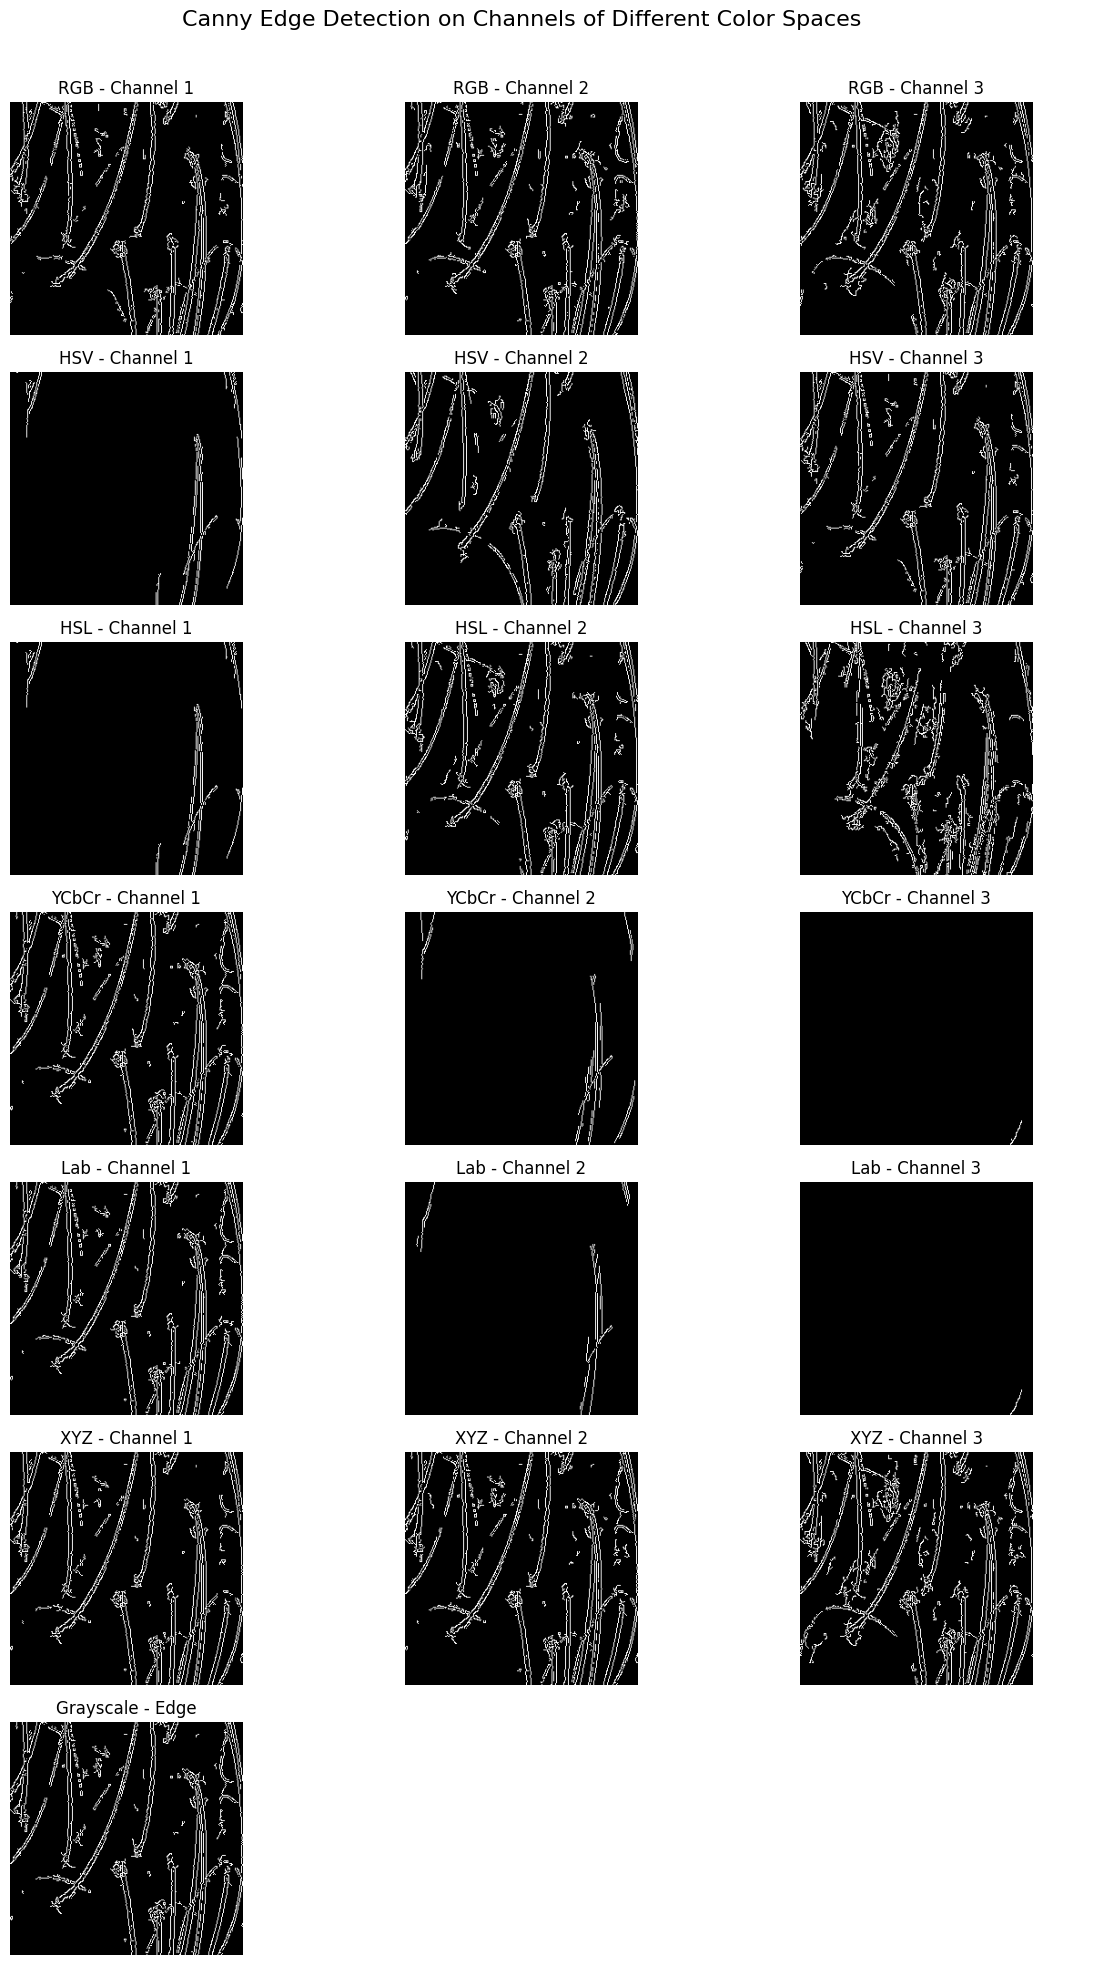

In [6]:
# Apply Canny edge detection on each channel of different color spaces
def apply_canny_on_channels(img, low_thresh=0, high_thresh=255):
    if len(img.shape) == 2:
        # Grayscale image
        return [cv2.Canny(img, low_thresh, high_thresh)]
    else:
        return [cv2.Canny(img[:, :, i], low_thresh, high_thresh) for i in range(3)]

# Reuse the previously defined gradient image and color space conversions
canny_results = {}
for space, (_, img) in color_spaces.items():
    canny_edges = apply_canny_on_channels(img, 35, 80)
    canny_results[space] = canny_edges

# Plot Canny edge detection results
fig, axs = plt.subplots(len(canny_results), 3, figsize=(12, 20))
fig.suptitle("Canny Edge Detection on Channels of Different Color Spaces", fontsize=16)

for idx, (space, edges) in enumerate(canny_results.items()):
    if space == "Grayscale":
        axs[idx, 0].imshow(edges[0], cmap='gray')
        axs[idx, 0].set_title(f"{space} - Edge")
        axs[idx, 1].axis('off')
        axs[idx, 2].axis('off')
    else:
        for ch in range(3):
            axs[idx, ch].imshow(edges[ch], cmap='gray')
            axs[idx, ch].set_title(f"{space} - Channel {ch + 1}")
    for ch in range(3):
        axs[idx, ch].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


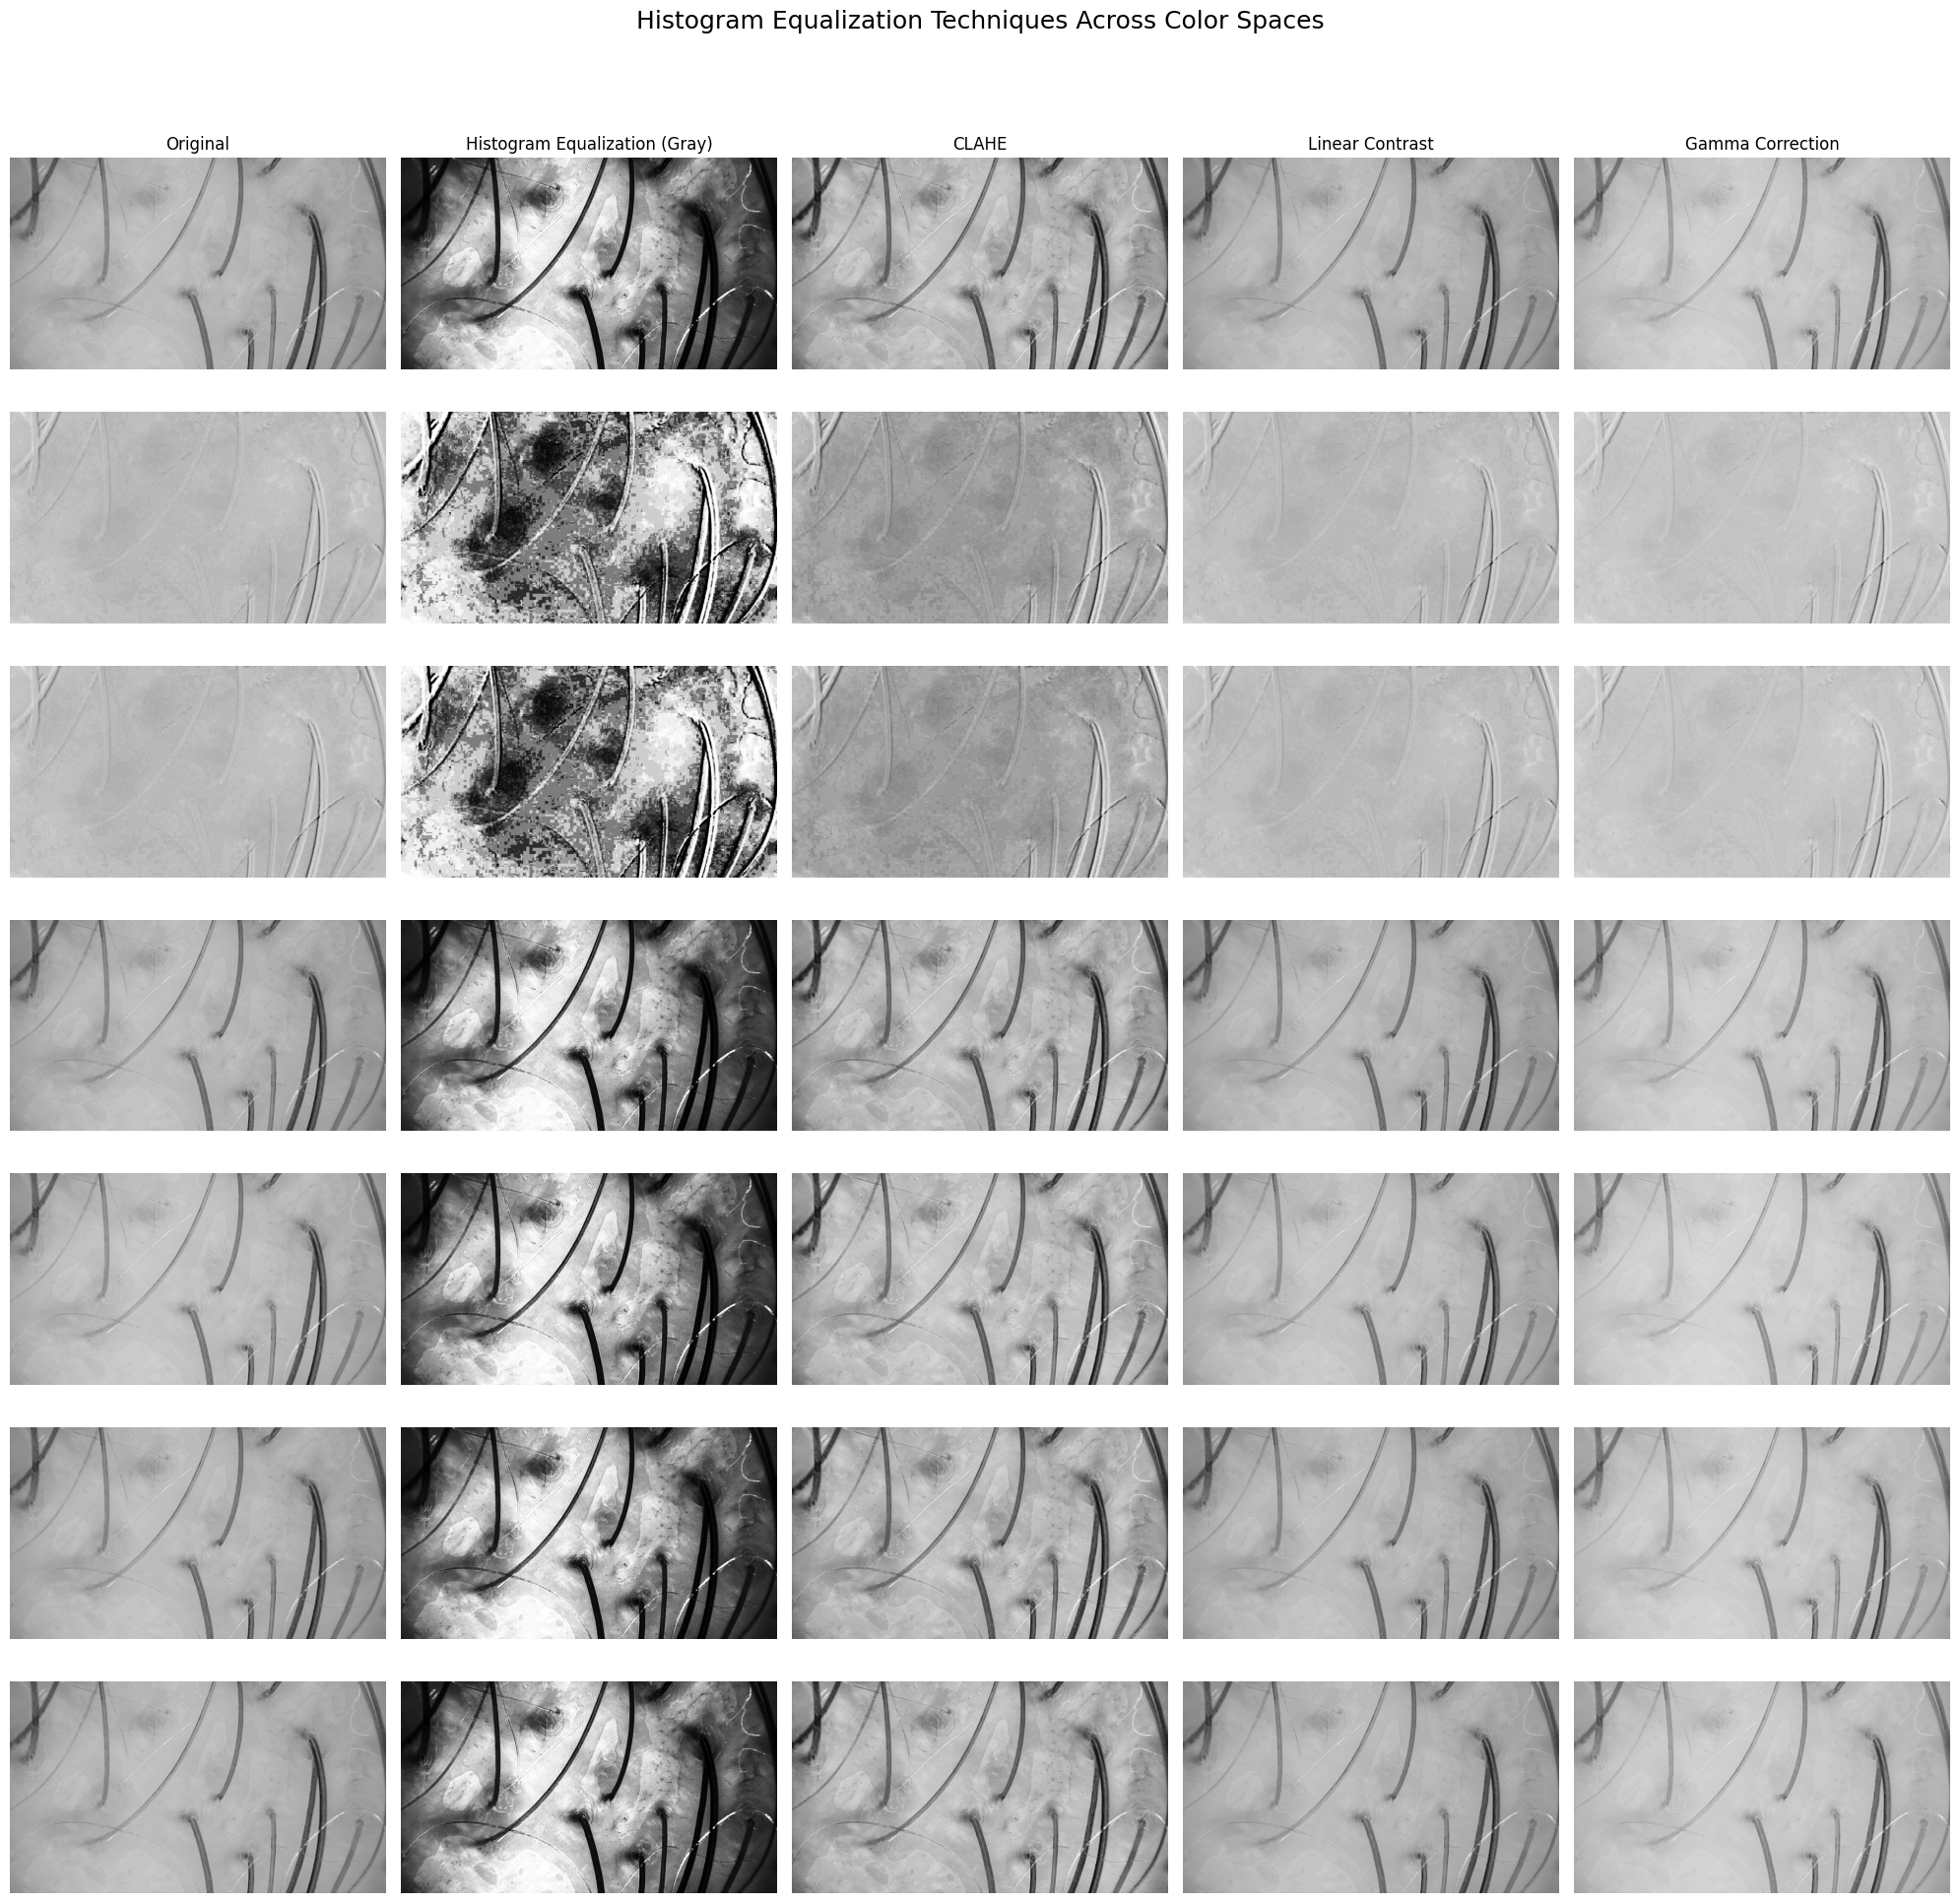

In [5]:
# Re-import necessary libraries after code execution environment reset
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(cv2.samples.findFile("./łysienie/03945.jpg"))

# Define color space conversions
color_spaces = {
    "RGB": ("RGB", image),
    "HSV": ("HSV", cv2.cvtColor(image, cv2.COLOR_RGB2HSV)),
    "HSL": ("HLS", cv2.cvtColor(image, cv2.COLOR_RGB2HLS)),
    "YCbCr": ("Y, Cb, Cr", cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)),
    "Lab": ("L, a, b", cv2.cvtColor(image, cv2.COLOR_RGB2Lab)),
    "XYZ": ("X, Y, Z", cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)),
    "Grayscale": ("Gray", cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)),
}

# Enhancement methods
def histogram_equalization_gray(img):
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img
    return cv2.equalizeHist(gray)

def clahe_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img
    return clahe.apply(gray)

def linear_contrast(img):
    return cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

def gamma_correction(img, gamma=1.5):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(img, table)

enhancement_methods = {
    "Original": lambda image: image,
    "Histogram Equalization (Gray)": histogram_equalization_gray,
    "CLAHE": clahe_equalization,
    "Linear Contrast": linear_contrast,
    "Gamma Correction": gamma_correction,
}

# Prepare the plot
fig, axs = plt.subplots(len(color_spaces), len(enhancement_methods), figsize=(20, 20))
fig.suptitle("Histogram Equalization Techniques Across Color Spaces", fontsize=18)

for row_idx, (space, (_, img)) in enumerate(color_spaces.items()):
    for col_idx, (method_name, method_func) in enumerate(enhancement_methods.items()):
        if space == "Grayscale":
            target_img = img
        else:
            if space == "RGB":
                gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            else:
                gray = img[:, :, 0]  # Assume luminance is in first channel for non-RGB
            target_img = gray

        enhanced = method_func(target_img)
        axs[row_idx, col_idx].imshow(enhanced, cmap='gray')
        axs[row_idx, col_idx].set_title(method_name if row_idx == 0 else "")
        axs[row_idx, col_idx].axis('off')
        if col_idx == 0:
            axs[row_idx, col_idx].set_ylabel(space, rotation=90, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
